## RNN (LSTM):

- 입력된 데이터의 순서를 고려
- 앞서 받은 데이터를 잠시 기억할 수 있다 -> 중요도에 따라 가중치를 적용하여 다음 데이터로 넘어간다.

- 1. 다수 입력 단일 출력 : 문장을 읽고 뜻을 파악할 때
- 2. 단입 입력 다수 출력 : 사진의 캡션을 만들 때
- 3. 다수 입력 다수 출력 : 문장을 번역할 때

## Classify Reuters with LSTM

In [3]:
from keras.datasets import reuters
import numpy as np

In [2]:
# words with frequency rank of 1-1000
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)

In [7]:
X_train.shape

(8982,)

In [8]:
X_test.shape

(2246,)

In [5]:
category = np.max(Y_train)+1
category

46

In [12]:
# count vector 3 = 3rd most frequent word
print(X_train[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


### Preprocessing

- 각 기사의 단어 수가 다름으로 단어의 숫자를 맞춰야 한다

In [13]:
from keras.preprocessing import sequence

In [14]:
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)

In [17]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

### Model

In [18]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

model = Sequential()
# embedding (총 단어 수, 기사당 단어 수)
model.add(Embedding(1000, 100))
# lstm(기사당 단어 수)
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [20]:
model.compile(loss='categorical_crossentropy',\
             optimizer='adam',\
             metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [21]:
history = model.fit(x_train, y_train,
                   batch_size=100, epochs=20,\
                   validation_data=(x_test, y_test))

Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 19s - loss: 2.6094 - acc: 0.3468 - val_loss: 2.4031 - val_acc: 0.3620
Epoch 2/20
8982/8982 [==============================] - 17s - loss: 2.1241 - acc: 0.4675 - val_loss: 1.9855 - val_acc: 0.5067
Epoch 3/20
8982/8982 [==============================] - 18s - loss: 1.9081 - acc: 0.5227 - val_loss: 1.8251 - val_acc: 0.5414
Epoch 4/20
8982/8982 [==============================] - 19s - loss: 1.7379 - acc: 0.5553 - val_loss: 1.7792 - val_acc: 0.5392
Epoch 5/20
8982/8982 [==============================] - 18s - loss: 1.6800 - acc: 0.5583 - val_loss: 1.7075 - val_acc: 0.5686
Epoch 6/20
8982/8982 [==============================] - 18s - loss: 1.6090 - acc: 0.5878 - val_loss: 1.6484 - val_acc: 0.5779
Epoch 7/20
8982/8982 [==============================] - 18s - loss: 1.5243 - acc: 0.6120 - val_loss: 1.5455 - val_acc: 0.6091
Epoch 8/20
8982/8982 [==============================] - 18s - loss: 1.

Text(0.5, 0, 'epoch')

Text(0, 0.5, 'loss')

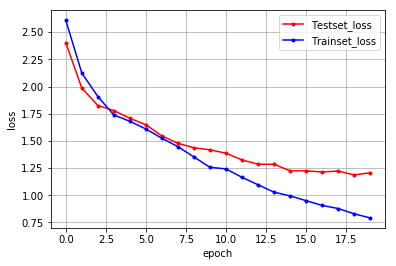

In [23]:
import matplotlib.pyplot as plt

y_vloss = history.history['val_loss']

# training set
y_loss = history.history['loss']

plt.plot(np.arange(len(y_loss)), y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(np.arange(len(y_loss)), y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()